![Astrofisica Computacional](../../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

---

# Ejercicio 03. Ecuaciones Diferenciales Ordinarias I


## A. Movimiento de un Cometa 


Existen muchos cometas que orbitan alrededor del Sol con trayectorias elípticas. De acuerdo con las leyes de Kepler, cuando el cometa se encuentra lejos del centro de fuerza, su movimiento es lento, mientras que al acercarse al Sol su velocidad es bastante grande. Este es un sistema físico que claramente debería ser solucionado con un método de paso adaptativo: en la región lejana se pueden utilizar pasos grandes mientras que en la región cercana se necesitan pasos muy cortos para tener un error pequeño.

Utilizando coordenadas cartesianas en el plano de movimiento, la dinámica del cometa bajo la influencia Solar está descrito por las ecuaciones 
\begin{align}
    \frac{d^2x}{dt^2} = &-GM \frac{x}{r^3} \\
    \frac{d^2y}{dt^2} = &-GM \frac{y}{r^3}
\end{align}
donde $r = \sqrt{x^2 + y^2}$, $G$ es la constante gravitacional de Newton y $M$ es la masa del Sol.

1. Escriba un programa para solucionar estas ecuaciones utilizando el método Runge-Kutta de orden 4 con paso fijo. Elija adecuadamente el sistema de unidades y escriba correspondientemente los valores de $M$ y $G$. Como condición inicial, suponga que en $t=0$ el cometa se encuentra en las coordenadas
    \begin{equation}
        \begin{cases}
            x = &4 \times 10^9 \text{ km}\\
            y = &0 \text{ km}
        \end{cases}
    \end{equation}
    y se mueve con la velocidad
    \begin{equation}
        \begin{cases}
            v^x = &0  \text{ m/s}\\
            v^y = &500 \text{ m/s}.
        \end{cases}
    \end{equation}
    
    Implemente una función que calcule las cantidades conservadas del problema (energía y momento angular) para cada paso temporal.
    Escoja un tamaño de paso $\Delta t$ apropiado para poder calcular al menos 5 orbitas completas del cometa. Grafique la trayectoria y compruebe que durante las 5 orbitas se mantiene igual.
    Grafique el comportamiento de las cantidades conservadas en función del tiempo y verifique su valor durante toda la trayectoria obtenida.

---
**Solución**

La masa del cometa, $m$, es siempre mucho más pequeña que la masa del Sol, i.e. $m \ll M$. Por ejemplo, la masa del cometa Halley es $m \approx 2.2 \times 10^{14}$ kg, la cual es mucho más pequeña que la masa del Sol, $M \approx 1.9 \times 10^{30}$ kg. Este hecho hace que el Sol permanezca estático mientras el cometa se mueve en orbita alrededor suyo bajo la influencia gravitacional.

Las ecuaciones dinámicas del cometa se pueden escribir como el siguiente sistema de 4 ecuaciones de primer orden restringidas al plano del movimiento,

\begin{align}
\frac{d x}{dt} = &v^x \\
\frac{d y}{dt} = &v^y \\
\frac{dv^x}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} x \\
\frac{dv^y}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} y
\end{align}


Una consideración importante para tener en cuenta involucra los grandes números presentes en el problema, como por ejemplo la masa del Sol y las distancias que se trabajan.  Por estq razón, lo más convenientes es utilizar un sistema de unidades adecuado para describir el Sistema Solar. Así, utilizaremos:

- unidad de masa: masa Solar $[M_{\odot }]$
- unidad distancia: Unidad Astronómica [au]
- unidad de tiempo: años [yr]

Utilizando este sistema de unidades, la constante gravitacional de Newton tendrá un valor de $G = 4\pi^2$,

De esta forma, implementaremos ua función llamada `f` que retornará el lado derecho de las ecuaciones diferenciales de movimiento y una función denominada `conserv_quant` que calculas las cantidades conservadas del problema (energía y momento angular).

In [1]:
import numpy as np

# Newtonian Gravitational Constant
G = 4.*np.pi**2
M = 1.

def f(t0, q0):
    '''
    ------------------------------------------
    f(t0, q0) 
    ------------------------------------------
    ODEs system for the motion of a comet 
    around the Sun using cartesian coordinates
    in the orbital plane.
    ------------------------------------------
    Arguments:
    t0: initial time
    q0: numpy array with the initial condition
        data:
        q0[0] = x
        q0[1] = y
        q0[2] = dx/dt
        q0[3] = dy/dt
    ------------------------------------------
    Dependeces: NumPy
    ------------------------------------------
    '''
    f = np.zeros(4)
    f[0] = q0[2]
    f[1] = q0[3]
    f[2] = - G*M*q0[0]/(q0[0]**2 + q0[1]**2)**(3/2)
    f[3] = - G*M*q0[1]/(q0[0]**2 + q0[1]**2)**(3/2)
    return f

def conserv_quant(q):
    '''
    ------------------------------------------
    conserv_quant(q)
    ------------------------------------------
    Evaluates the total energy and the total 
    angular momentum for the system 
    ------------------------------------------
    Arguments:
    q: NumPy array with the state of the 
       system in the format
       q = [t, x, y, vx, vy]
    ------------------------------------------
    Returns:
    E : Total Energy
    L : Total Angular Momentum
    ------------------------------------------
    Dependeces: NumPy
    ------------------------------------------
    '''
    CQ = np.zeros([len(q),3])
    CQ[:,0] = q[:,0] 
    v2 = q[:,3]**2 + q[:,4]**2
    r = np.sqrt(q[:,1]**2 + q[:,2]**2)
    E = v2/2 - G*M/r
    L = q[:,1]*q[:,4] - q[:,2]*q[:,3]
    CQ[:,1] = E
    CQ[:,2] = L
    return CQ


**Condición Inicial**

Como establece el enunciado del ejercicio, se impondrán las siguientes condiciones iniciales:

\begin{equation}
        \begin{cases}
            x = &4 \times 10^9 \text{ km}\\
            y = &0 \text{ km}\\
            v^x = &0  \text{ m/s}\\
            v^y = &500 \text{ m/s}.
        \end{cases}
    \end{equation}
    
Transformamos esta información a las unidades establecidas arriba,

In [2]:
# Initial Conditions
x = 4e9 # [km]
y = 0 # [km]
vx = 0 # [m/s]
vy = 500 # [m/s]

# Conversion Factors
au2m = 1.496e11  # 1au in meters
yr2s = 3.154e7   # 1yr in seconds

# Transformation
x *= 1000/au2m # [au]
y *= 1000/au2m # [au]
vx *= yr2s/au2m # [au/yr]
vy *= yr2s/au2m # [au/yr]


x, vy

(26.737967914438503, 0.10541443850267379)

## Solución del sistema ODEs

Definiremos una malla temporal con intervalos constantes iniciando en $t_0 = 0$ hasta $t_f = 300$ años y utilizaremos el algoritmo RK4 para resolver el sistema de ecuaciones diferenciales.

In [3]:
# Computation time
import time

# Runge-Kutta 4 Algorithm
def RK4(ODE, t0, q0, tf, n):
    '''
    ------------------------------------------
    RK4(h, t0, q0)
    4th Order Runge-Kutta method for solving 
    a system of ODEs.
    ------------------------------------------
    Arguments:
    ODE: function defining the system of ODEs
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    n: Number of steps for the integration
    ------------------------------------------
    Dependences: NumPy
    ------------------------------------------
    '''
    dt = (tf - t0)/(n-1)
    q = np.zeros([n,len(q0)+1])
    q[0,0] = t0
    q[0,1:] = q0
    for i in range(1,n):
        q[i,0] = q[i-1,0] + dt
        k1 = dt*ODE(q[i-1,0], q[i-1,1:])
        k2 = dt*ODE(q[i-1,0] + dt/2, q[i-1,1:] + k1/2)
        k3 = dt*ODE(q[i-1,0] + dt/2, q[i-1,1:] + k2/2)
        k4 = dt*ODE(q[i-1,0] + dt, q[i-1,1:] + k3)
        q[i,1:] = q[i-1,1:] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return q


# Creation of the time grid (in years)
t0 = 0.
tf = 300.

# Number of steps in the grid
n = 500000

# Constant stepsize defined by the number of steps in the grid
dt = (tf - t0)/n

# Initial Conditions
Q0 = np.array([x, y, vx, vy])

# Solving the System
start = time.time()
Q = RK4(f, t0, Q0, tf, n)
conservedQuantities = conserv_quant(Q)
end = time.time()

print('El tiempo de computo fue:', end - start)

El tiempo de computo fue: 8.514582633972168


Visualizamos la coordenada x para contar un número total de 6 orbitas alrededor del Sol,

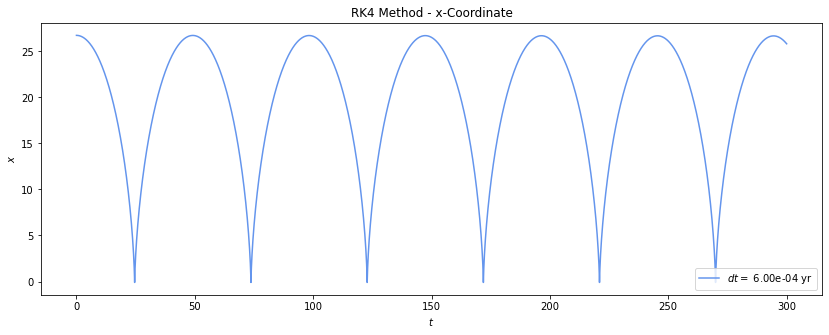

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14,5))
ax.plot(Q[:,0], Q[:,1], color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')
ax.set_title('RK4 Method - x-Coordinate')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.legend()

plt.show()

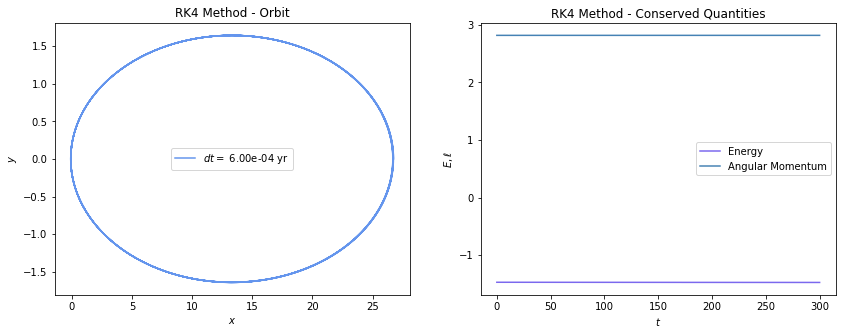

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(Q[:,1], Q[:,2], color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')
ax[0].set_title('RK4 Method - Orbit')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend()

ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,1], color='mediumslateblue', label=f'Energy')
ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,2], color='steelblue', label=f'Angular Momentum')
ax[1].set_title('RK4 Method - Conserved Quantities')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].legend()

plt.show()

Para este tamaño del paso de integración se presenta una leve perdida de energía: 

In [6]:
print('El cambio en energía es :', np.abs(conservedQuantities[-1,1] - conservedQuantities[0,1]))
print('\nEl cambio en momento angular es :', np.abs(conservedQuantities[-1,2] - conservedQuantities[0,2]))

El cambio en energía es : 0.0032078299935627275

El cambio en momento angular es : 8.962847601434731e-06


---

Para mejorar el calculo de la orbita y de las cantidades conservadas, aumentaremos el número de pasos de $5\times 10^5$ a $2\times 10^6$.

In [7]:
# Creation of the time grid (in years)
t0 = 0.
tf = 300.

# Number of steps in the grid
n = 2000000

# Constant stepsize defined by the number of steps in the grid
dt = (tf - t0)/n

# Initial Conditions
Q0 = np.array([x, y, vx, vy])

# Solving the System
start = time.time()
Q = RK4(f, t0, Q0, tf, n)
conservedQuantities = conserv_quant(Q)
end = time.time()
print('El tiempo de computo fue:', end - start)

El tiempo de computo fue: 33.34579110145569


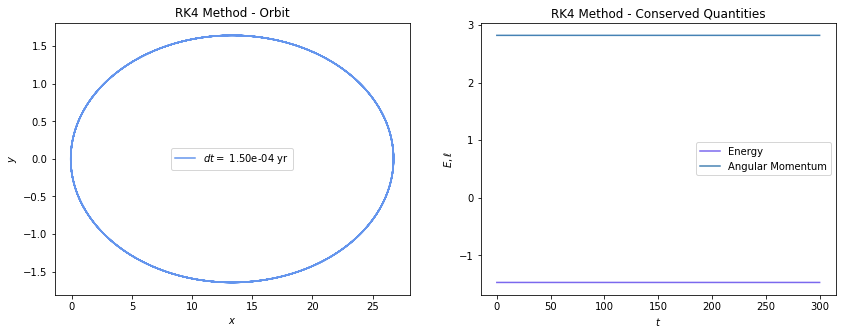

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(Q[:,1], Q[:,2], color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')
ax[0].set_title('RK4 Method - Orbit')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend()

ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,1], color='mediumslateblue', label=f'Energy')
ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,2], color='steelblue', label=f'Angular Momentum')
ax[1].set_title('RK4 Method - Conserved Quantities')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].legend()

plt.show()

In [9]:
print('El cambio en energía es :', np.abs(conservedQuantities[-1,1] - conservedQuantities[0,1]))
print('\nEl cambio en momento angular es :', np.abs(conservedQuantities[-1,2] - conservedQuantities[0,2]))

El cambio en energía es : 3.159380857375993e-06

El cambio en momento angular es : 8.797397477167124e-09


In [10]:
# Save data of the orbit
np.savetxt('comet_orbit.txt', Q, header='t x y vx vy')